BIKE RENTAL PREDICTION MODEL

In [9]:
import pandas as pd          # for data handling
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns        # for better visualizations


In [10]:
data = pd.read_csv("BikeRentalData.csv")

In [11]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


## understanding data

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [13]:
data.describe()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [14]:
data.columns


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt'],
      dtype='object')

### check for missing value and treating them if any

In [15]:
data.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [16]:
data.shape

(17379, 14)

### plotting plot to understand more about data

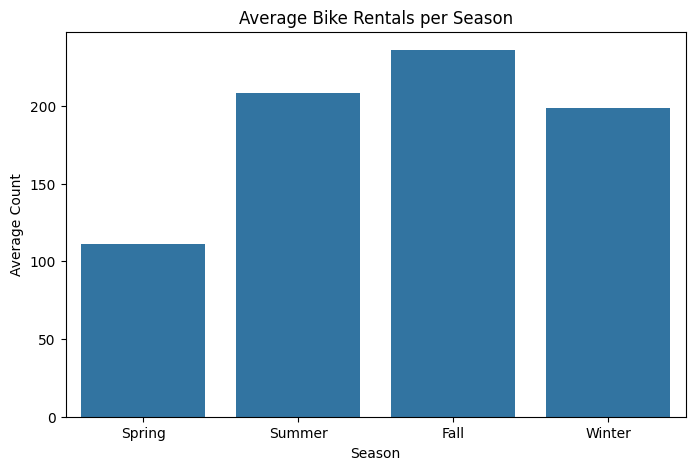

In [17]:
plt.figure(figsize=(8, 5))
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_avg = data.groupby('season')['cnt'].mean().rename(index=season_labels)
sns.barplot(x=season_avg.index, y=season_avg.values)
plt.title("Average Bike Rentals per Season")
plt.ylabel("Average Count")
plt.xlabel("Season")
plt.show()

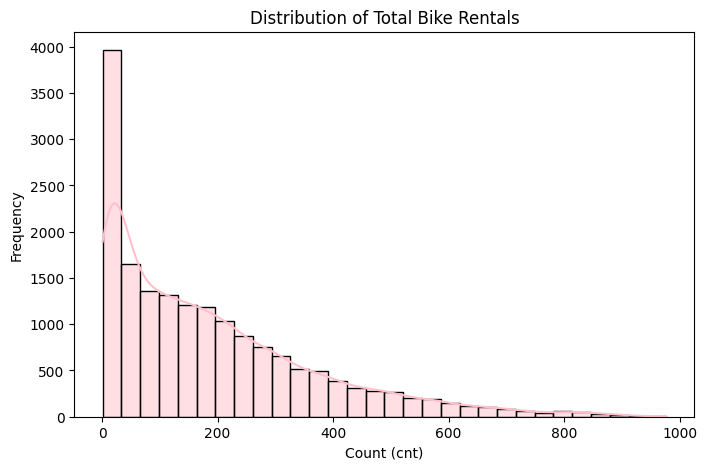

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], bins=30, kde = True,color='pink')
plt.title("Distribution of Total Bike Rentals")
plt.xlabel("Count (cnt)")
plt.ylabel("Frequency")
plt.show()


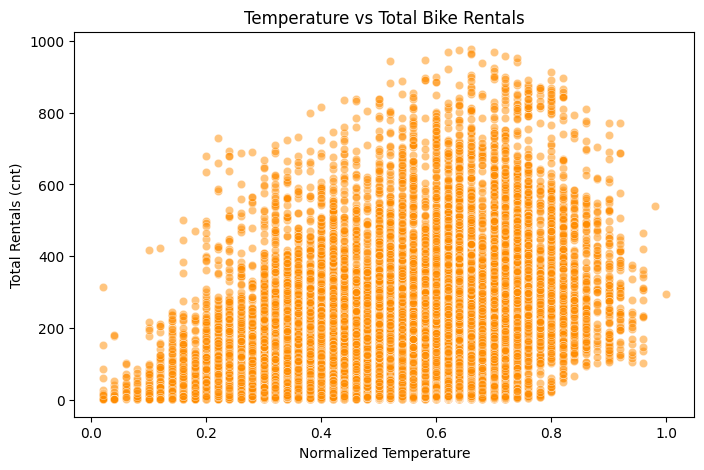

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=data, alpha=0.5, color='darkorange')
plt.title("Temperature vs Total Bike Rentals")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Rentals (cnt)")
plt.show()

Text(0.5, 1.0, 'Trendline: Temp vs Rentals')

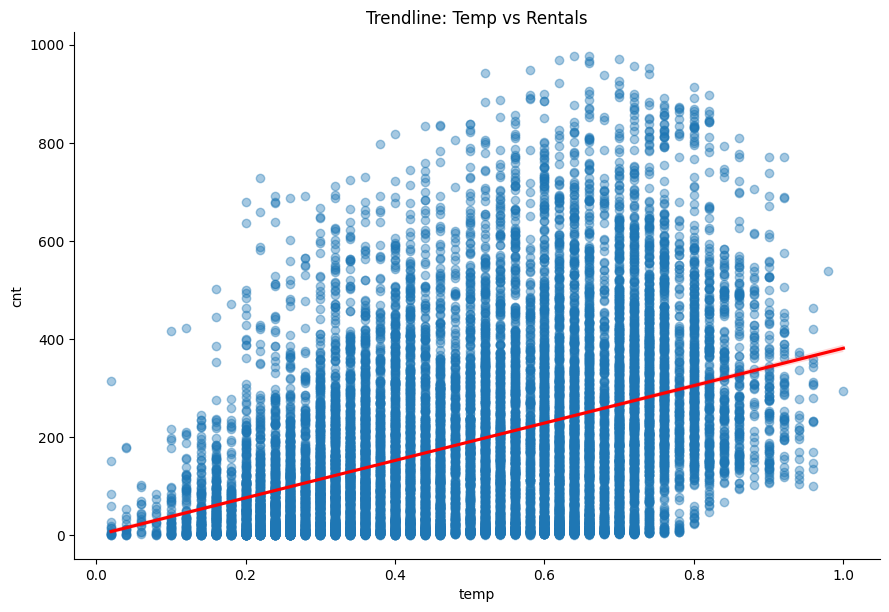

In [20]:
sns.lmplot(data=data, x='temp', y='cnt', height=6, aspect=1.5, scatter_kws={'alpha':0.4}, line_kws={"color":"red"})
plt.title("Trendline: Temp vs Rentals")


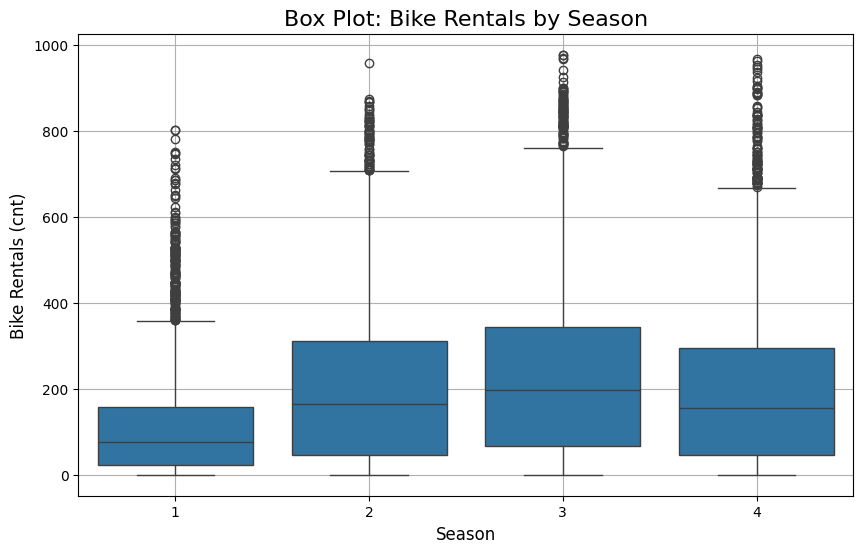

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='season', y='cnt')

plt.title("Box Plot: Bike Rentals by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Bike Rentals (cnt)", fontsize=12)
plt.grid(True)
plt.show()

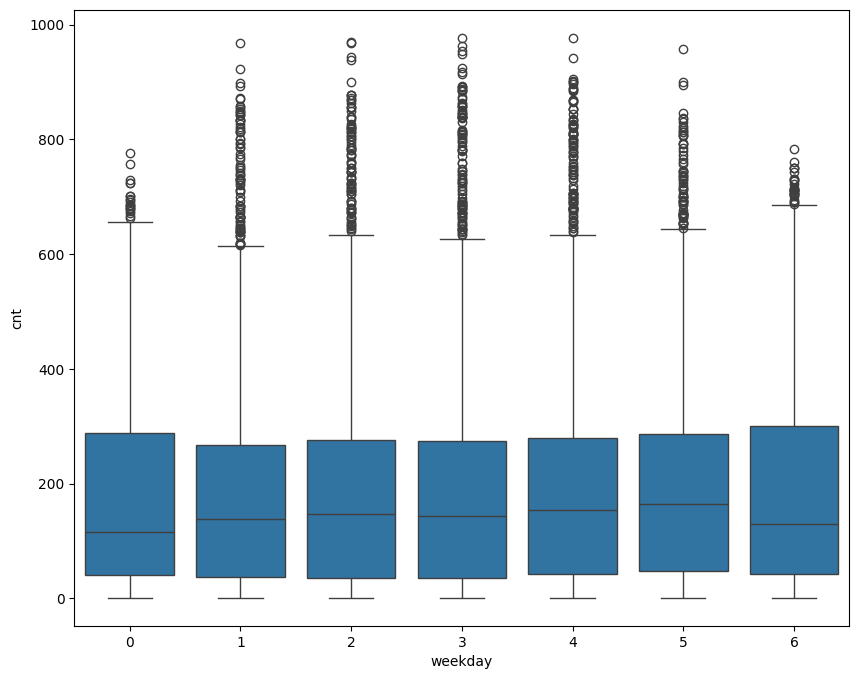

In [22]:
plt.figure(figsize = (10,8))
sns.boxplot(data= data , x='weekday',y='cnt')
plt.show()

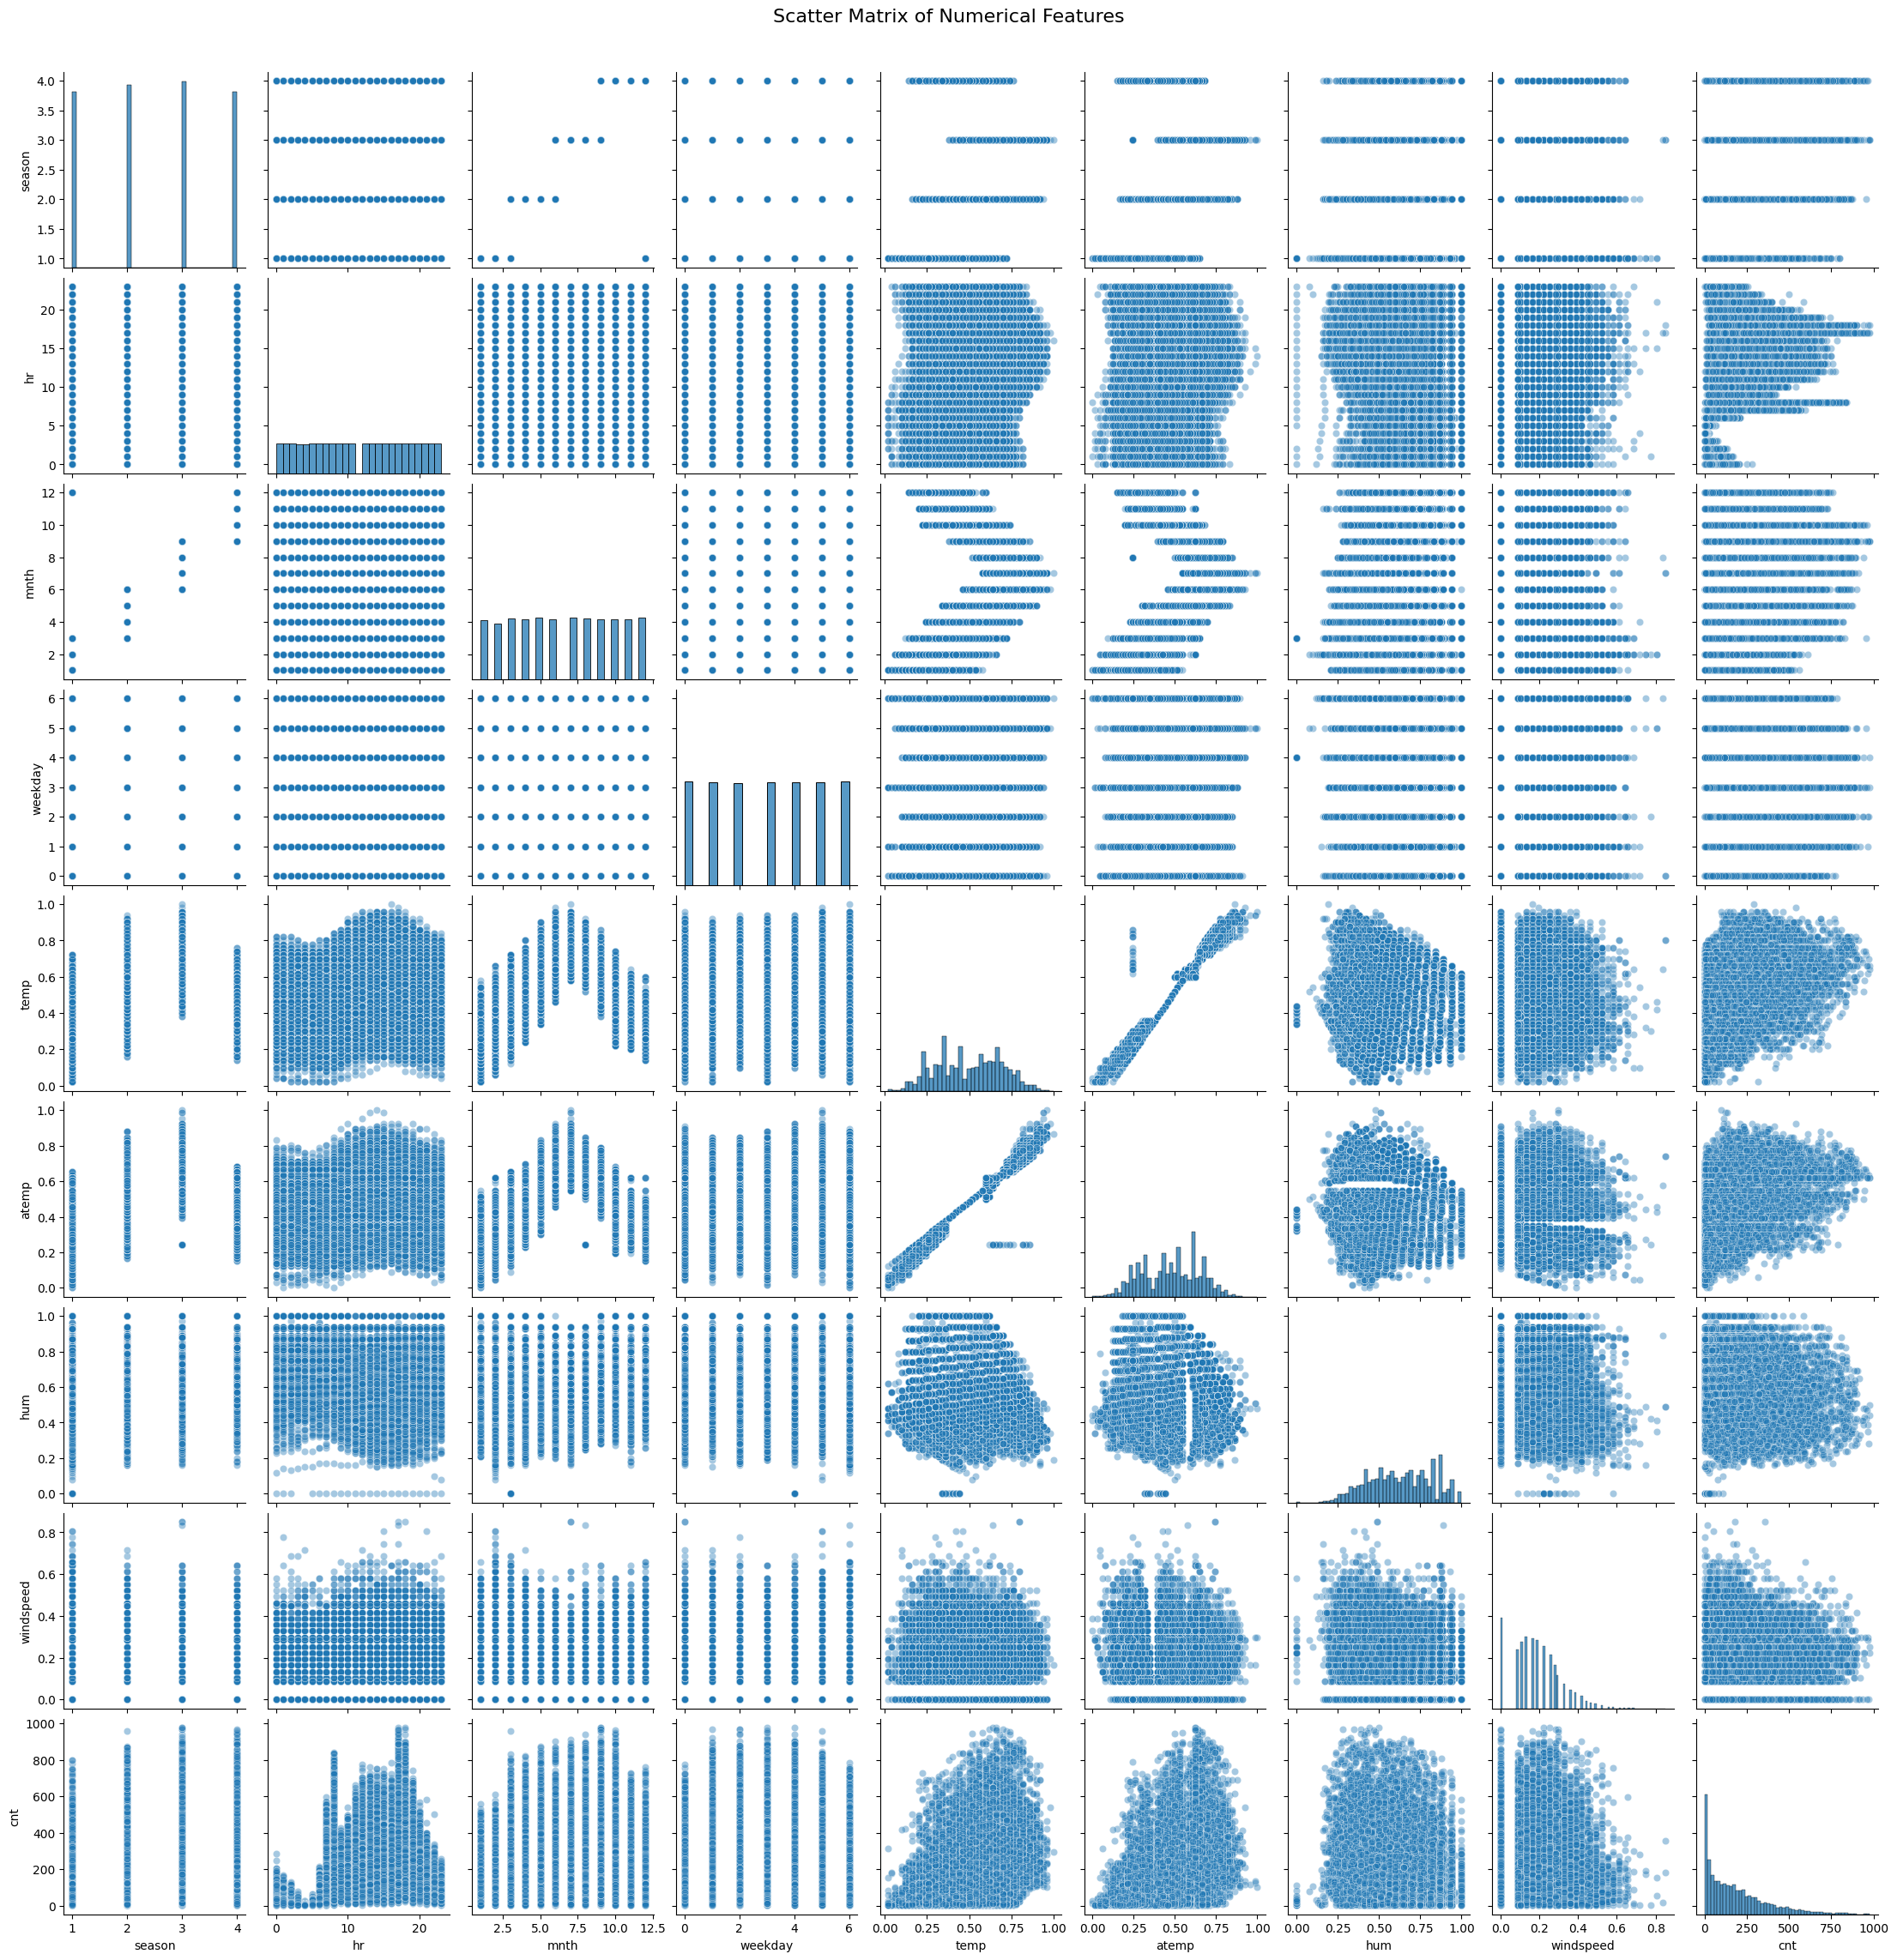

In [23]:
num_cols = ['season','hr', 'mnth','weekday','temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_num = data[num_cols]

sns.pairplot(df_num, corner=False, plot_kws={'alpha': 0.4})

plt.suptitle("Scatter Matrix of Numerical Features", y=1.02, fontsize=16)
plt.show()

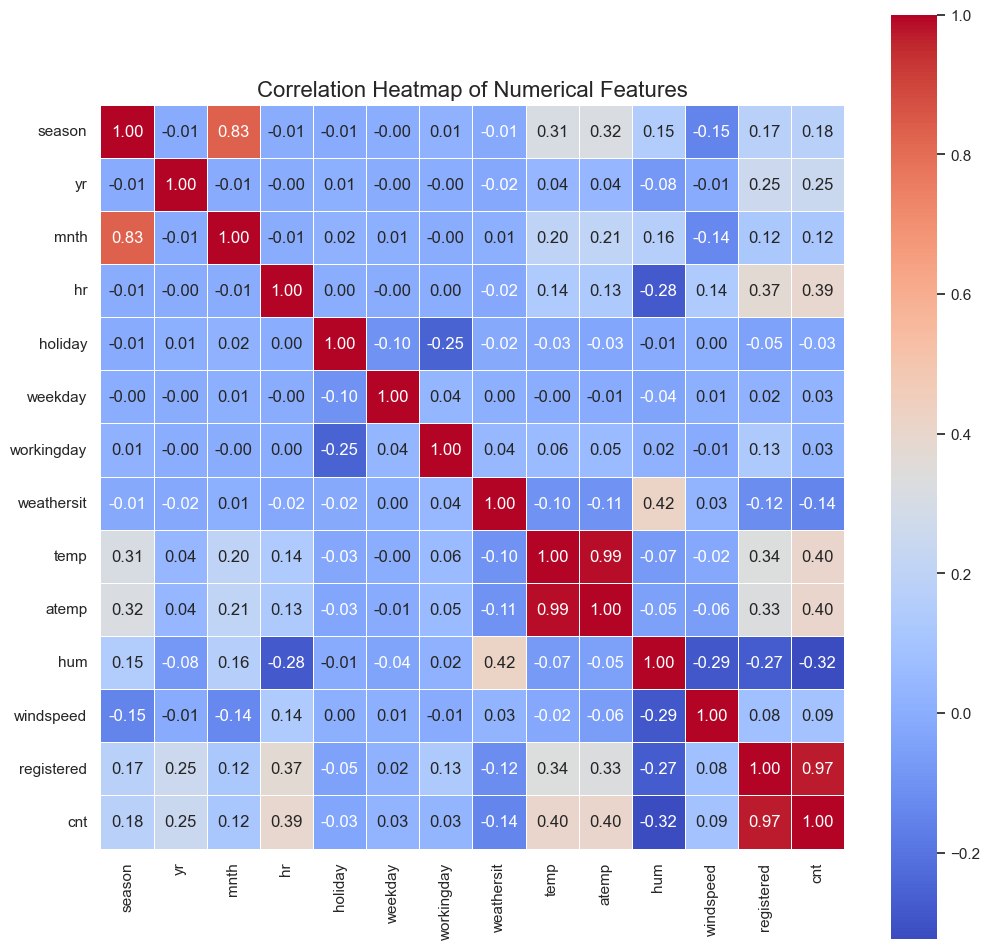

In [24]:
m_cols = [col for col in data.columns if data[col].dtype!=bool]

df_num = data[m_cols]

# Compute correlation matrix
corr_matrix = df_num.corr()

# Set plot style
sns.set(style="white")

# Create heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

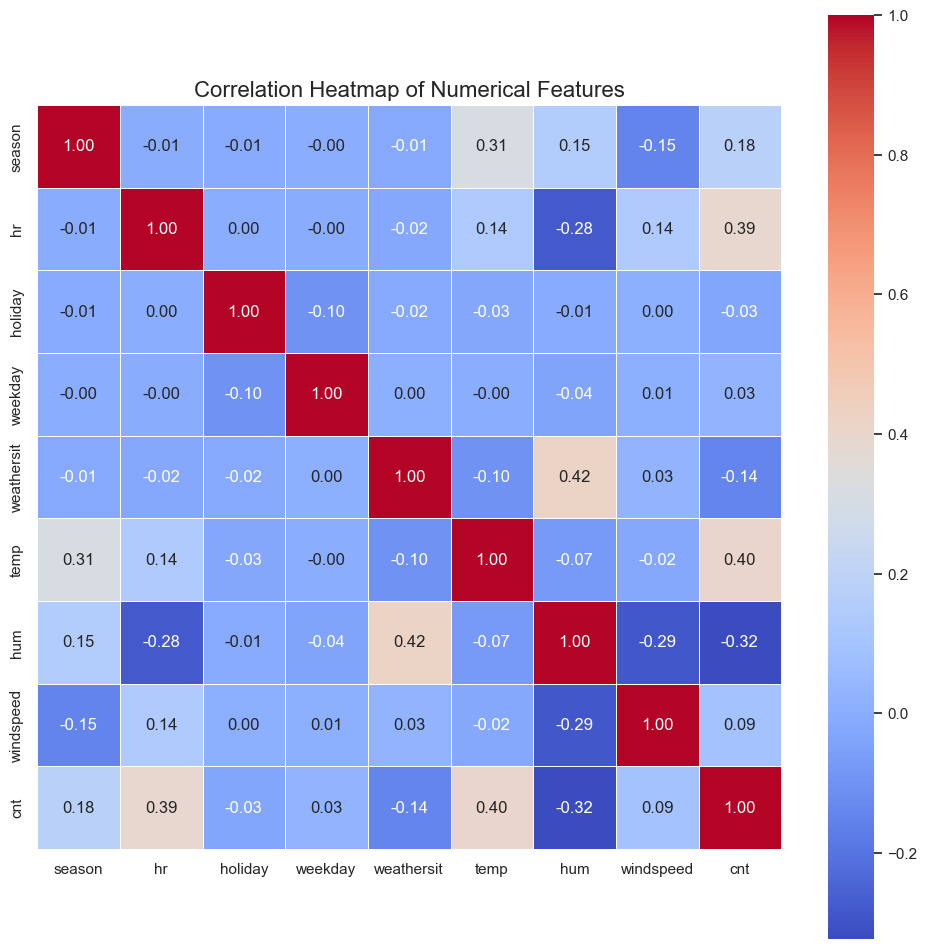

In [25]:
num_cols = ['season', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

df_num = data[num_cols]

# Compute correlation matrix
corr_matrix = df_num.corr()

# Set plot style
sns.set(style="white")

# Create heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

### training on random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features = ['season', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
data = data[features]
x = data.drop('cnt',axis=1)
y = data['cnt']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

model_random = RandomForestRegressor(n_estimators =100,random_state = 50)
model_random.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
print(f"Train Score on outlier treated data: {model_random.score(x_train, y_train):.2f}")
print(f"Test Score on outlier treated data : {model_random.score(x_test, y_test):.2f}")


Train Score on outlier treated data: 0.98
Test Score on outlier treated data : 0.85


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_pred = model_random.predict(x_train)
y_pred = model_random.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"mRMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

mRMSE: 69.21
MAE: 44.83
